# PART I - Fully Connected Neural Networks

We covered artificial neural networks with multiple hidden layers in class. In this assignment, you will implement Fully Connected Neural Network (FCN) components in order to perform a supervised classification task.

The dataset you are going to work with are : (i) for development of your code, you will use Wine dataset for classification; (ii) for actual training and testing of your implementation in this assignment, the actual dataset will be Book Genre Classification data. You will be performing a genre classification of books into 32 categories.

Usage of any built-in functions for code parts that you are asked to write are not allowed. We provide a skeleton code on which to build on your own architecture. In the Layer class, there are two important methods, named as forward and backward. Almost everything you will use in this assignment is derived from this class. We will follow PyTorch-like architecture in the skeleton code.

**Please do not modify the following cells, except the book genre classification cell. We will use them for the evaluation of your homeworks. **

**You should modify and fill in the code under blg561/layers.py, which includes functions such as layer.NNLayer.* ...**



In [295]:
import numpy as np
from blg561e.layer import layer
from blg561e.checks import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### To auto-reload your modules from the *.py files, re run the following cell

In [272]:
%reload_ext autoreload
%autoreload 2

## Layers

In the `Layer` class, there are two important methods, named as `forward` and `backward`. Almost everything you will use in this assignment is derived from this class. You will be programming in Python language.

**Don't forget to test your implementation by using the cells below!**



### a. Affine Layer

In this layer, we basically implement the hidden layers of neural nets. Each neuron (building block of neural networks) is a just logistic regression classifier itself, but stacking these neurons make them powerful to implement any function.
We are going to implement our affine layer 

Go under blg561e/layer.py and find Affine class. Implement the forward pass for Affine layer which is formulated as follows:

$ z = W x + b $ 

#### Forward pass

In [4]:
num_inputs = 10
input_shape = (4, 7, 2) 
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
affineLayer = layer.AffineLayer(input_size, weight_size)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
affineLayer.W = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
affineLayer.b = np.linspace(-0.3, 0.1, num=output_dim)
out = affineLayer.forward(x)
correct_out = np.array([[-0.34448963, -0.15630714,  0.03187535],
       [-0.18626697,  0.0119934 ,  0.21025377],
       [-0.0280443 ,  0.18029394,  0.38863218],
       [ 0.13017836,  0.34859447,  0.56701059],
       [ 0.28840102,  0.51689501,  0.74538901],
       [ 0.44662368,  0.68519555,  0.92376742],
       [ 0.60484634,  0.85349608,  1.10214583],
       [ 0.763069  ,  1.02179662,  1.28052425],
       [ 0.92129166,  1.19009716,  1.45890266],
       [ 1.07951432,  1.35839769,  1.63728107]])

relError = rel_error(out, correct_out)

print('Testing forward method of affine layer:')
print('difference: ', relError)
assert 1e-6 > relError

Testing forward method of affine layer:
difference:  8.825372662436368e-08


#### Backward pass : 
Go under blg561e/layer.py and find AffineLayer class. Implement the backward pass for Affine layer.

In [5]:
np.random.seed(1773)
num_inputs = 7
input_shape = (4, 10, 3)
output_dim = 8

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
affineLayer = layer.AffineLayer(input_size, weight_size)


x = np.random.randn(10, 2, 3)
affineLayer.W = np.random.randn(6, 5)
affineLayer.b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = grad_check(affineLayer.forward, x, dout)
dw_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.W, dout)
db_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.b, dout)

affineLayer.forward(x)
dx, dw, db = affineLayer.backward(dout)

# Errors should be around 1e-6 at least
print('Testing backward method of affine layer:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

assert 1e-6 > rel_error(dx_num, dx) 
assert 1e-6 > rel_error(dw_num, dw) 
assert 1e-6 > rel_error(db_num, db) 

Testing backward method of affine layer:
dx error:  8.322946841758815e-10
dw error:  2.9043699773260153e-09
db error:  3.216964989387283e-11


### b. ReLU Layer

Go under `blg561e/layer.py` and find `ReLU` class. Implement the forward pass for ReLU which is basicly zeroing the negative inputs:

$ ReLU(x) = max(x, 0) $

#### Forward pass

In [6]:
relu = layer.ReLU()
x = np.array([0,1,3,4,-1,2,4,1773,-1773, 1.3, .4, -.1]).reshape(3, -1)
out = relu.forward(x)
correct_out = np.array([[0.000, 1.000, 3.000, 4.000],
                       [0.000, 2.000, 4.000, 1773],
                       [0.000, 1.300, 0.4, 0]])

# Compare your output with ours. 
relError = rel_error(out, correct_out)
print('Testing forward method of ReLU layer:')
print('Error: ', rel_error(out, correct_out))
assert 1e-6 > relError

Testing forward method of ReLU layer:
Error:  0.0


#### Backward pass

In [9]:
relu = layer.ReLU()
np.random.seed(1773)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = grad_check(relu.forward, x, dout)

relu.forward(x)
dx = relu.backward(dout)
# The error should be around 3e-12
print('Testing backward method of ReLU layer:')
print('dx error: ', rel_error(dx_num, dx))

Testing backward method of ReLU layer:
dx error:  3.2756263483625388e-12


### c. Softmax classifier 

In multi-class classification task, as we've seen in the class, the softmax loss function is utilized. 
Practically, at the final layer of the network, instead of the standard activation, we utilize softmax function to turn the likelihood of each class into class probabilities. Then, we utilize the cross-entropy loss as the data loss. Below, you implement and return only the data loss component in your overall loss. 
*** Implement your loss computation in the function "loss" of the layer.py ***

The L2 regularizer will be added by you in the Optimization phase later.
You will write forward pass and backward pass for the softmax unit. Below, we evaluate your method by a numerical gradient method.

In [10]:
np.random.seed(1773)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

softmax = layer.Softmax()

def softmax_loss (x,y):
    probs = softmax.forward(x)
    dx = softmax.backward(y)
    
    loss = layer.loss(probs, y) 
    return loss,dx

loss, dx = softmax_loss(x,y)

dx_num = grad_check(lambda x: softmax_loss(x, y)[0], x)

# The loss should be about 2.3
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.302478991941983
dx error:  8.698659869674144e-09


### d. Implement your activation (Bonus)
Implement a novel or a recently published activation function and test its correctness below. If you used an activation from a paper, please don't forget to give a reference to it. Make sure that you have the correct implementation of the forward pass so that we can test your backward pass using a numerical gradient.

Also, under this cell, write your activation mathematically and its derivative. Do not forget to use your activation in training part with the Wine data to show that it works and makes sense. You can also plot your activation for litte extra credits.

In [274]:
act = layer.YourActivation()
np.random.seed(1773)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = grad_check(act.forward, x, dout)

act.forward(x)
dx = act.backward(dout)

relError = rel_error(dx_num, dx)
print('Testing your activation:')
print('dx error: ', relError)

Testing your activation:
dx error:  0.8944288726913566


### e. Optimizers

Implement SGD and SGDWithMomentum Strategies in `VanillaSGDOptimizer` and `SGDWithMomentum` classes. Test their correctness using cell below. 
**Do not forget to add L2 regularization to both optimizers.**

In [14]:
np.random.seed(1773)
toyModel = layer.Model()
layers = [layer.AffineLayer(10,2, seed=1773), layer.AffineLayer(2,3, seed=1773), layer.Softmax()]
toyModel(layers)
optimizer = layer.VanillaSDGOptimizer(model=toyModel, lr=1, regularization_str=1e-1)

x = np.random.randn(3,10)
y = np.array([0,1,2]).reshape(1,-1)
toyModel.forward(x)
toyModel.backward(y)
optimizer.optimize()
expected = [ np.array([[ 0.97873084,  0.81250429],
 [-3.7373582,  -4.06007668],
 [ 0.29461562, -0.37317717],
 [ 0.23786611 , 0.27586238],
 [-1.45262147, -2.34007449],
 [ 0.03742712, -0.24127232],
 [ 0.2617457 ,  0.51694319],
 [ 0.35243035,  0.96434886],
 [ 0.17950643,  0.76174137],
 [ 1.62739663,  1.42935729]]),
np.array([-0.23634795, -0.22072128]),
np.array([[-0.53813187, -0.23883808, -0.09825078],
 [-1.90591288, -1.13402054, -0.4392717 ]]),
np.array([-0.34588157, -0.00713497,  0.35301654])]


In [15]:
student_out = []
for i in range(2):
    student_out.append( toyModel[i].W)
    student_out.append(toyModel[i].b)
for i in range(4):
    relError = rel_error(student_out[i], expected[i])
    if i % 2 == 0:
        print('Testing Weights of {}th layer'.format(i%2))
    else:
        print('Testing biases of {}th layer'.format(i%2))
    assert 1e-6 > relError

Testing Weights of 0th layer
Testing biases of 1th layer
Testing Weights of 0th layer
Testing biases of 1th layer


In [16]:
np.random.seed(1773)
toyModel = layer.Model()
layers = [layer.AffineLayer(10,2, seed=1773), layer.AffineLayer(2,3, seed=1773), layer.Softmax()]
toyModel(layers)
optimizer = layer.SGDWithMomentum(model=toyModel, lr=1, regularization_str=1e-1, mu=.5)

x = np.random.randn(3,10)
y = np.array([0,1,2]).reshape(1,-1)
toyModel.forward(x)
toyModel.backward(y)
optimizer.optimize()
expected = [np.array([[ 0.97873084,  0.81250429],
        [-3.7373582 , -4.06007668],
        [ 0.29461562, -0.37317717],
        [ 0.23786611,  0.27586238],
        [-1.45262147, -2.34007449],
        [ 0.03742712, -0.24127232],
        [ 0.2617457 ,  0.51694319],
        [ 0.35243035,  0.96434886],
        [ 0.17950643,  0.76174137],
        [ 1.62739663,  1.42935729]]),
 np.array([-0.23634795, -0.22072128]),
 np.array([[-0.53813187, -0.23883808, -0.09825078],
        [-1.90591288, -1.13402054, -0.4392717 ]]),
 np.array([-0.34588157, -0.00713497,  0.35301654])]
    
    


In [17]:
student_out = []
for i in range(2):
    student_out.append( toyModel[i].W)
    student_out.append(toyModel[i].b)
for i in range(4):
    relError = rel_error(student_out[i], expected[i])
    if i % 2 == 0:
        print('Testing Weights of {}th layer'.format(i%2))
    else:
        print('Testing biases of {}th layer'.format(i%2))
    assert 1e-6 > relError

Testing Weights of 0th layer
Testing biases of 1th layer
Testing Weights of 0th layer
Testing biases of 1th layer


## f. Build your own model!

Below is an example which is implemented using previously defined API. In this example, you will use the widely known Wine dataset (https://archive.ics.uci.edu/ml/datasets/wine). Each instance has 13 features as the chemical analysis of wines and you will classify the data where the class number is 3 and each class represents different origin of wines.

In [276]:
from sklearn import preprocessing
from sklearn.datasets import load_wine  # Load dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names) # Before training, understand your data
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [23]:
X, y = data.data, data.target # Get the features and the corresponding classes
model = layer.Model() # Create a model instance
 
# Wine dataset has 13 features, so the input size of first layer is 13. We have 3 classes, so size of last hidden is 3. 
# Each neuron corresponds the likelihood of a class, named P(y=neuron_index|x), where y is class label 
# and x is features given.
layers = [layer.AffineLayer(13,16), layer.ReLU(), layer.AffineLayer(16,32), layer.ReLU(), layer.AffineLayer(32,3), layer.Softmax()]

model(layers) # Load layers to model object
predictions  = np.ones(178) # Number of instances in the Wine data is 178
train_accs = []
test_accs = []
train_losses = []
test_losses = []

# Shuffle dataset
def create_permutation(x, y):
    perm = np.random.permutation(len(x))
    return x[perm], y[perm]

def train_test_split(X, y, ratio=.2):
    X, y = create_permutation(X, y)
    split_index =  int(len(X) * (1-ratio))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]
    return X_train, y_train, X_test, y_test
    

# Options
preprocessing_on = True
shuffle_on_each_epoch = True
regularization_strength = 1e-7
n_epochs = 1000
train_test_split_ratio = .2
print_every = 50
test_every = 200
if preprocessing_on:
    X = preprocessing.scale(X)
    
X_train, y_train, X_test, y_test = train_test_split(X, y)

optimizer = layer.SGDWithMomentum(model,lr=1e-3, regularization_str=regularization_strength)

for epoch in range(n_epochs):
    if shuffle_on_each_epoch:
        X_train, y_train = create_permutation(X_train, y_train)
    softmax_out = model.forward(X_train)

    predictions = np.argmax(softmax_out, axis=1)
    train_acc = np.mean(predictions == y_train)
    loss = layer.loss(softmax_out, y_train)
    
    train_accs.append(train_acc)
    train_losses.append(loss)
    
    if epoch % print_every == 0:
        print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, loss, train_acc))
    
    model.backward(y_train)
    optimizer.optimize()

    
    if epoch % test_every == 0:
            
        softmax_out = model.forward(X_test)
        predictions = np.argmax(softmax_out, axis=1)
        loss = layer.loss(softmax_out, y_test)
        test_acc = np.mean(predictions == y_test)
        
        for i in range(test_every):
            test_losses.append(loss)
            test_accs.append(test_acc)
        #test_accs.append(test_acc)
        print("Epoch: {}, Test Loss: {}, Test Accuracy: {}".format(epoch, loss, test_acc))

Epoch: 0, Loss: 8.625958443570875, Accuracy: 0.09859154929577464
Epoch: 0, Test Loss: 5.470136464676513, Test Accuracy: 0.1111111111111111
Epoch: 50, Loss: 1.12649196533196, Accuracy: 0.5774647887323944
Epoch: 100, Loss: 0.8980940201513027, Accuracy: 0.6690140845070423
Epoch: 150, Loss: 0.7544516791371254, Accuracy: 0.7112676056338029
Epoch: 200, Loss: 0.6686707778504835, Accuracy: 0.7887323943661971
Epoch: 200, Test Loss: 0.8524557519314278, Test Accuracy: 0.6388888888888888
Epoch: 250, Loss: 0.6167203350979423, Accuracy: 0.8169014084507042
Epoch: 300, Loss: 0.581932071981168, Accuracy: 0.8450704225352113
Epoch: 350, Loss: 0.5560392533699753, Accuracy: 0.8732394366197183
Epoch: 400, Loss: 0.5352504114885857, Accuracy: 0.8732394366197183
Epoch: 400, Test Loss: 0.6925443213045124, Test Accuracy: 0.7777777777777778
Epoch: 450, Loss: 0.5177443164137281, Accuracy: 0.8802816901408451
Epoch: 500, Loss: 0.5025592902128605, Accuracy: 0.8873239436619719
Epoch: 550, Loss: 0.4890606227303331, Acc

### g. Plot the training and test loss curves for diagnostics below:

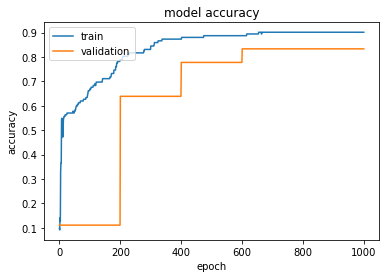

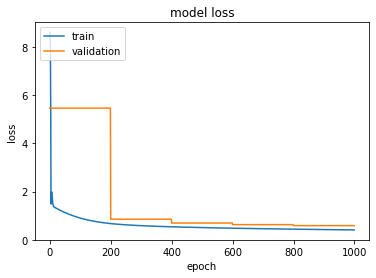

In [24]:
plt.plot(train_accs)
plt.plot(test_accs)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(train_losses)
plt.plot(test_losses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### h. Train and plot the training and test loss curves for my activation function:

#### Instead of ReLU, I used my activation function for training and testing

In [278]:
X, y = data.data, data.target # Get the features and the corresponding classes
model = layer.Model() # Create a model instance
 
layers = [layer.AffineLayer(13,16), layer.YourActivation(), layer.AffineLayer(16,32), layer.YourActivation(), layer.AffineLayer(32,3), layer.Softmax()]

model(layers) # Load layers to model object
predictions  = np.ones(178) # Number of instances in the Wine data is 178
train_accs = []
test_accs = []
train_losses = []
test_losses = []

# Shuffle dataset
def create_permutation(x, y):
    perm = np.random.permutation(len(x))
    return x[perm], y[perm]

def train_test_split(X, y, ratio=.2):
    X, y = create_permutation(X, y)
    split_index =  int(len(X) * (1-ratio))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]
    return X_train, y_train, X_test, y_test
    

# Options
preprocessing_on = True
shuffle_on_each_epoch = True
regularization_strength = 1e-7
n_epochs = 1000
train_test_split_ratio = .2
print_every = 50
test_every = 200
if preprocessing_on:
    X = preprocessing.scale(X)
    
X_train, y_train, X_test, y_test = train_test_split(X, y)

optimizer = layer.SGDWithMomentum(model,lr=1e-3, regularization_str=regularization_strength)

for epoch in range(n_epochs):
    if shuffle_on_each_epoch:
        X_train, y_train = create_permutation(X_train, y_train)
    softmax_out = model.forward(X_train)

    predictions = np.argmax(softmax_out, axis=1)
    train_acc = np.mean(predictions == y_train)
    loss = layer.loss(softmax_out, y_train)
    
    train_accs.append(train_acc)
    train_losses.append(loss)
    
    if epoch % print_every == 0:
        print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, loss, train_acc))
    
    model.backward(y_train)
    optimizer.optimize()

    
    if epoch % test_every == 0:
            
        softmax_out = model.forward(X_test)
        predictions = np.argmax(softmax_out, axis=1)
        loss = layer.loss(softmax_out, y_test)
        test_acc = np.mean(predictions == y_test)
        
        for i in range(test_every):
            test_losses.append(loss)
            test_accs.append(test_acc)
        #test_accs.append(test_acc)
        print("Epoch: {}, Test Loss: {}, Test Accuracy: {}".format(epoch, loss, test_acc))

Epoch: 0, Loss: 9.801890144818271, Accuracy: 0.14084507042253522
Epoch: 0, Test Loss: 6.545681783198762, Test Accuracy: 0.3888888888888889
Epoch: 50, Loss: 0.5866244994709019, Accuracy: 0.7323943661971831
Epoch: 100, Loss: 0.5801067993752862, Accuracy: 0.7323943661971831
Epoch: 150, Loss: 0.5755958798005253, Accuracy: 0.7394366197183099
Epoch: 200, Loss: 0.5709057987174938, Accuracy: 0.7394366197183099
Epoch: 200, Test Loss: 1.3591773651942232, Test Accuracy: 0.6388888888888888
Epoch: 250, Loss: 0.5505589790149062, Accuracy: 0.7394366197183099
Epoch: 300, Loss: 0.5336565380927297, Accuracy: 0.7464788732394366
Epoch: 350, Loss: 0.3756222492395582, Accuracy: 0.7464788732394366
Epoch: 400, Loss: 0.36969017634839685, Accuracy: 0.9295774647887324
Epoch: 400, Test Loss: 1.0777062628025653, Test Accuracy: 0.8888888888888888
Epoch: 450, Loss: 0.3659646805285599, Accuracy: 0.9295774647887324
Epoch: 500, Loss: 0.36272226009811465, Accuracy: 0.9295774647887324
Epoch: 550, Loss: 0.3598270168331879

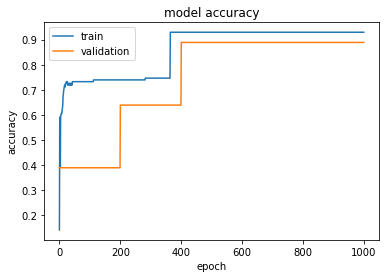

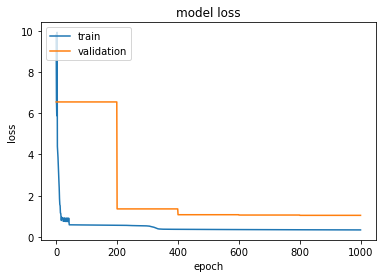

In [279]:
plt.plot(train_accs)
plt.plot(test_accs)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(train_losses)
plt.plot(test_losses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

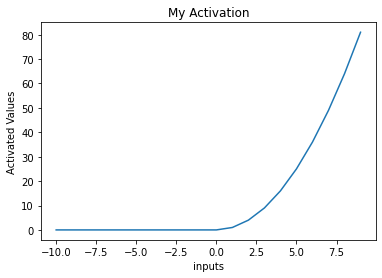

In [289]:
myData = [i for i in range(-10,10)]

myAct = layer.YourActivation()
out = myAct.forward(myData)
plt.plot(myData, out)
plt.title('My Activation')
plt.ylabel('Activated Values')
plt.xlabel('inputs')
plt.show()
# My Activation Funtion is plotted. Negatives are zero, positives are squared.

# PART II - Book Genre Classification

Now, in this part, you will work with text data (https://arxiv.org/pdf/1610.09204.pdf) for book genre analysis. Originally, the dataset is used for book genre classification by the book cover image. In this part, you will classify the books into their genres by their titles. The total number of genres for the books to be classified into is 32.

Below, we already implemented the preprocessing codes fro the data. Run the below cells and load the text data "book32-listing.csv" into an appropriate form. You will need to use batch-wise optimizer since it is almost impossible to fit all the data at once.

**IMPORTANT: You are NOT allowed to use sklearn or any other implementations for the learning part
. You are ALLOWED ONLY TO USE your own implementation from the above steps.**

In [298]:
# Read csv into a data frame
csv = 'book32-listing.csv'
all_data = pd.read_csv(csv, encoding = 'ISO-8859-1', index_col=0)
all_data.head()

,Image,Image_link,Title,Author,Class,Genre
Id,,,,,,
761183272,0761183272.jpg,http://ecx.images-amazon.com/images/I/61Y5cOdH...,Mom's Family Wall Calendar 2016,Sandra Boynton,3,Calendars
1623439671,1623439671.jpg,http://ecx.images-amazon.com/images/I/61t-hrSw...,Doug the Pug 2016 Wall Calendar,Doug the Pug,3,Calendars
B00O80WC6I,B00O80WC6I.jpg,http://ecx.images-amazon.com/images/I/41X-KQqs...,"Moleskine 2016 Weekly Notebook, 12M, Large, Bl...",Moleskine,3,Calendars
761182187,0761182187.jpg,http://ecx.images-amazon.com/images/I/61j-4gxJ...,365 Cats Color Page-A-Day Calendar 2016,Workman Publishing,3,Calendars
1578052084,1578052084.jpg,http://ecx.images-amazon.com/images/I/51Ry4Tsq...,Sierra Club Engagement Calendar 2016,Sierra Club,3,Calendars


In [299]:
# As we only care about the Title, Author and Class columns, we will extract them and shuffle the data
# We can enrich the feature representation by including the Author information
from sklearn.utils import shuffle
data = all_data[['Title', 'Author', 'Class']]
data['Text'] = data['Title'].astype(str) + ' ' + data['Author'].astype(str)
data = data[['Text', 'Class']]
data = shuffle(data, random_state=42)
data.head()

<ipython-input-299-971b6204215f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text'] = data['Title'].astype(str) + ' ' + data['Author'].astype(str)


,Text,Class
Id,,
471839655,Fundamentals of Photonics (Wiley Series in Pur...,23
1604691956,50 Beautiful Deer-Resistant Plants: The Pretti...,8
62237330,Eric: A Novel of Discworld Terry Pratchett,24
472051849,"The North Country Trail: The Best Walks, Hikes...",29
806983590,"The Rug Hook Book: Techniques, Projects And Pa...",8


In [300]:
# Now, we will use some very basic text cleaning steps 
import nltk
import re
nltk.download('stopwords') # After you download the data, you can comment this line 

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) # Stopwords carry far less meaning than other keywords in the text

def clean_text(text):
    # Remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # Remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # Remove whitespaces 
    text = ' '.join(text.split()) 
    # Convert text to lowercase 
    text = text.lower()
    # Remove stopwords
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    
    return ' '.join(no_stopword_text)

data['Text'] = data['Text'].apply(lambda x: clean_text(x))
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\duygu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Class
Id,,
471839655,fundamentals photonics wiley series pure appli...,23
1604691956,beautiful deer resistant plants prettiest annu...,8
62237330,eric novel discworld terry pratchett,24
472051849,north country trail best walks hikes backpacki...,29
806983590,rug hook book techniques projects patterns eas...,8


In [301]:
# We will extract features from the text and split the data into training, validation and test sets

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500) 
# You can change the max_features if you encounter a memory error, but do not make it too small

x_train_series, y_train = data['Text'][:150000], data['Class'][:150000] # 150K train
x_val_series, y_val = data['Text'][150000:180000], data['Class'][150000:180000] # 30K val
x_test_series, y_test = data['Text'][180000:], data['Class'][180000:] # ~30K test

x_train = np.array(vectorizer.fit_transform(x_train_series).todense())
x_val = np.array(vectorizer.transform(x_val_series).todense())
x_test = np.array(vectorizer.transform(x_test_series).todense())

### a. You will use your implementations (layers.py) below to carry out the book genre classification. Construct your model with all its layers in the cell below.

In [302]:
n_epochs = 20000
print_every = 100
test_every = 500

lr = 1e-1
rs = 1e-5

model = layer.Model() # Create a model instance

layers = [layer.AffineLayer(2500,512), layer.ReLU(), 
          layer.AffineLayer(512,32), layer.Softmax()]

model(layers) # Load layers to model object

initialW1 = model.layers[0].W
initialW2 = model.layers[2].W

    


optimizer = layer.SGDWithMomentum(model, lr=lr, regularization_str=rs)

for epoch in range(n_epochs):   #train all config parameters

    samples = np.random.choice(x_train.shape[0], size=m_batch)  #mini batch size samples are selected

    x = x_train[samples,:]
    y = y_train[samples]

    softmax_out = model.forward(x)                  #forward of all layers are executed and final layer gives probs mtrx.
    predictions = np.argmax(softmax_out, axis=1)    #Highest prob will be our predicted result
    train_acc = np.mean(predictions == y)           #Compare with correct class avg them, get accuracy
    loss = layer.loss(softmax_out, y)               #Calculate loss

    train_accs.append(train_acc)
    train_loss.append(loss)

    if epoch % print_every == 0:
        print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, loss, train_acc))

    model.backward(y)                               #Calculate derivatives
    optimizer.optimize()                            #Update weights and biases
        
       
finalW1 = model.layers[0].W
finalW2 = model.layers[2].W



Epoch: 0, Loss: 13.185586835738388, Accuracy: 0.0146484375
Epoch: 100, Loss: 6.404966458948828, Accuracy: 0.0859375
Epoch: 200, Loss: 4.093178815131452, Accuracy: 0.123046875
Epoch: 300, Loss: 3.7152495203385936, Accuracy: 0.18359375
Epoch: 400, Loss: 3.3147398137212036, Accuracy: 0.2666015625
Epoch: 500, Loss: 2.8854544429918594, Accuracy: 0.2861328125
Epoch: 600, Loss: 2.7901036067756673, Accuracy: 0.2998046875
Epoch: 700, Loss: 2.683370587978197, Accuracy: 0.337890625
Epoch: 800, Loss: 2.747620890970005, Accuracy: 0.3037109375
Epoch: 900, Loss: 2.533660562477211, Accuracy: 0.3525390625
Epoch: 1000, Loss: 2.4685649294154155, Accuracy: 0.3759765625
Epoch: 1100, Loss: 2.4582199684286152, Accuracy: 0.376953125
Epoch: 1200, Loss: 2.46267872529822, Accuracy: 0.3798828125
Epoch: 1300, Loss: 2.4239736363763233, Accuracy: 0.3798828125
Epoch: 1400, Loss: 2.274122725889458, Accuracy: 0.4287109375
Epoch: 1500, Loss: 2.3600912001720857, Accuracy: 0.3779296875
Epoch: 1600, Loss: 2.261983153523732

Epoch: 13500, Loss: 1.6605809543458527, Accuracy: 0.5341796875
Epoch: 13600, Loss: 1.680857013603923, Accuracy: 0.5263671875
Epoch: 13700, Loss: 1.6105766792645038, Accuracy: 0.5322265625
Epoch: 13800, Loss: 1.5961570443123516, Accuracy: 0.556640625
Epoch: 13900, Loss: 1.668517927018617, Accuracy: 0.529296875
Epoch: 14000, Loss: 1.6026234858300175, Accuracy: 0.560546875
Epoch: 14100, Loss: 1.5473103621529207, Accuracy: 0.5654296875
Epoch: 14200, Loss: 1.5992724143498926, Accuracy: 0.5615234375
Epoch: 14300, Loss: 1.616562502260152, Accuracy: 0.5498046875
Epoch: 14400, Loss: 1.6103081369275767, Accuracy: 0.5595703125
Epoch: 14500, Loss: 1.577670773517526, Accuracy: 0.5537109375
Epoch: 14600, Loss: 1.558229027267974, Accuracy: 0.5595703125
Epoch: 14700, Loss: 1.6616964497249094, Accuracy: 0.5478515625
Epoch: 14800, Loss: 1.623146510744499, Accuracy: 0.5361328125
Epoch: 14900, Loss: 1.6604885475259854, Accuracy: 0.533203125
Epoch: 15000, Loss: 1.5996557023340456, Accuracy: 0.5361328125
Ep

### b. Plot histogram of the weights of affine layers to see whether the weights vanish or not and comment.

When we compare the initial weights and final weights we can see that weights are not vanished 

(array([[  0.,   0.,   0., ..., 478., 391.,  21.],
        [  0.,   0.,   0., ..., 481., 383.,  16.],
        [  0.,   0.,   0., ..., 467., 386.,  18.],
        ...,
        [  0.,   0.,   0., ..., 467., 422.,  20.],
        [  0.,   0.,   1., ..., 481., 369.,  21.],
        [  0.,   0.,   4., ..., 477., 393.,  26.]]),
 array([-0.60850006, -0.43249473, -0.25648939, -0.08048406,  0.09552127,
         0.2715266 ,  0.44753194,  0.62353727,  0.7995426 ,  0.97554793,
         1.15155327]),
 <a list of 512 Lists of Patches objects>)

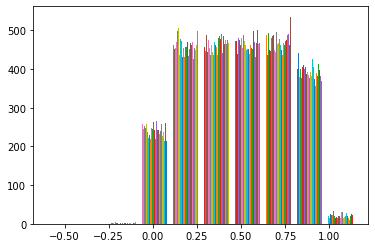

In [305]:
## import matplotlib.pyplot as plt

plt.hist(initialW1)


(array([[  0.,   5.,  31., 117., 154., 144.,  55.,   6.,   0.,   0.],
        [  0.,   1.,  29., 103., 185., 155.,  34.,   5.,   0.,   0.],
        [  0.,  11.,  38., 109., 149., 124.,  65.,  15.,   1.,   0.],
        [  2.,   4.,  44., 117., 136., 124.,  69.,  16.,   0.,   0.],
        [  1.,  12.,  50., 107., 137., 120.,  65.,  17.,   3.,   0.],
        [  1.,   6.,  36., 122., 151., 127.,  55.,  13.,   1.,   0.],
        [  2.,  16.,  54.,  98., 124., 127.,  68.,  20.,   2.,   1.],
        [  0.,  12.,  54.,  98., 143., 117.,  64.,  22.,   2.,   0.],
        [  1.,  11.,  33., 103., 165., 125.,  58.,  14.,   2.,   0.],
        [  0.,   4.,  50.,  98., 165., 122.,  56.,  15.,   2.,   0.],
        [  0.,   6.,  31., 116., 164., 123.,  63.,   9.,   0.,   0.],
        [  0.,   8.,  37., 121., 154., 108.,  70.,  14.,   0.,   0.],
        [  2.,   5.,  32., 108., 168., 136.,  50.,   9.,   2.,   0.],
        [  0.,   3.,  34., 105., 176., 134.,  55.,   5.,   0.,   0.],
        [  1.,   7.,

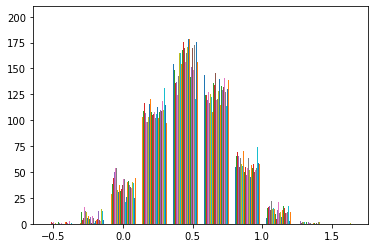

In [306]:
plt.hist(initialW2)



(array([[  0.,   0.,   0., ..., 478., 391.,  21.],
        [  0.,   0.,   0., ..., 481., 383.,  16.],
        [  0.,   0.,   0., ..., 467., 386.,  18.],
        ...,
        [  0.,   0.,   0., ..., 467., 422.,  20.],
        [  0.,   0.,   1., ..., 481., 369.,  21.],
        [  0.,   0.,   4., ..., 477., 393.,  26.]]),
 array([-0.60850006, -0.43249473, -0.25648939, -0.08048406,  0.09552127,
         0.2715266 ,  0.44753194,  0.62353727,  0.7995426 ,  0.97554793,
         1.15155327]),
 <a list of 512 Lists of Patches objects>)

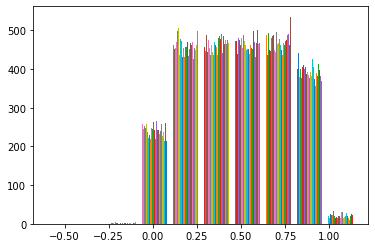

In [307]:
plt.hist(finalW1)


(array([[  0.,   5.,  31., 117., 154., 144.,  55.,   6.,   0.,   0.],
        [  0.,   1.,  29., 103., 185., 155.,  34.,   5.,   0.,   0.],
        [  0.,  11.,  38., 109., 149., 124.,  65.,  15.,   1.,   0.],
        [  2.,   4.,  44., 117., 136., 124.,  69.,  16.,   0.,   0.],
        [  1.,  12.,  50., 107., 137., 120.,  65.,  17.,   3.,   0.],
        [  1.,   6.,  36., 122., 151., 127.,  55.,  13.,   1.,   0.],
        [  2.,  16.,  54.,  98., 124., 127.,  68.,  20.,   2.,   1.],
        [  0.,  12.,  54.,  98., 143., 117.,  64.,  22.,   2.,   0.],
        [  1.,  11.,  33., 103., 165., 125.,  58.,  14.,   2.,   0.],
        [  0.,   4.,  50.,  98., 165., 122.,  56.,  15.,   2.,   0.],
        [  0.,   6.,  31., 116., 164., 123.,  63.,   9.,   0.,   0.],
        [  0.,   8.,  37., 121., 154., 108.,  70.,  14.,   0.,   0.],
        [  2.,   5.,  32., 108., 168., 136.,  50.,   9.,   2.,   0.],
        [  0.,   3.,  34., 105., 176., 134.,  55.,   5.,   0.,   0.],
        [  1.,   7.,

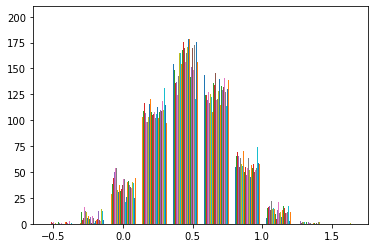

In [308]:
plt.hist(finalW2)

### c. Run diagnostics of your model : Try different hyperparameter settings such as number of layers in your model, learning rate, regularization parameter and such.  Avoid overfitting and underfitting as much as possible. We expect you to get at least 50% test accuracy with your final model.

In [249]:
# Options

#My Hyperparameters are:

# 0  : lr = 1e-1, reg = 1e-3, momentum = True
# 1  : lr = 1e-1, reg = 1e-3, momentum = False
# 2  : lr = 1e-1, reg = 1e-5, momentum = True
# 3  : lr = 1e-1, reg = 1e-5, momentum = False
# 4  : lr = 5e-2, reg = 1e-3, momentum = True
# 5  : lr = 5e-2, reg = 1e-3, momentum = False
# 6  : lr = 5e-2, reg = 1e-5, momentum = True
# 7  : lr = 5e-2, reg = 1e-5, momentum = False
# 8  : lr = 1e-2, reg = 1e-3, momentum = True
# 9  : lr = 1e-2, reg = 1e-3, momentum = False
# 10 : lr = 1e-2, reg = 1e-5, momentum = True
# 11 : lr = 1e-2, reg = 1e-5, momentum = False

#Number of epoches 20000

n_epochs = 20000
print_every = 100
test_every = 500

lrs = [1e-1, 5e-2, 1e-2]
rss = [1e-3, 1e-5]
momentum = [True, False]


grid_search = []
train_accss = []
val_accss = []
train_losses = []
val_losses = []
best_models = []
best_test = -1


for lr in lrs:
    for rs in rss:
        for m in momentum:            
            grid_search.append((lr, rs, m))


for config in grid_search:   # Try for every config
    
    model = layer.Model() # Create a model instance
 
    layers = [layer.AffineLayer(2500,512), layer.ReLU(), 
              layer.AffineLayer(512,32), layer.Softmax()]

    model(layers) # Load layers to model object
        
    lr, rs, momentum = config
          
    train_accs = []
    val_accs = []
    train_loss = []
    val_loss = []
    best_val = -1
    
    if(momentum):  #Check config for Which optimizer to use
        optimizer = layer.SGDWithMomentum(model, lr=lr, regularization_str=rs)
    else:
        optimizer = layer.VanillaSDGOptimizer(model, lr=lr, regularization_str=rs)
    
    for epoch in range(n_epochs):   #train all config parameters

        samples = np.random.choice(x_train.shape[0], size=m_batch)  #mini batch size samples are selected

        x = x_train[samples,:]
        y = y_train[samples]
        
        softmax_out = model.forward(x)                  #forward of all layers are executed and final layer gives probs mtrx.
        predictions = np.argmax(softmax_out, axis=1)    #Highest prob will be our predicted result
        train_acc = np.mean(predictions == y)           #Compare with correct class avg them, get accuracy
        loss = layer.loss(softmax_out, y)               #Calculate loss

        train_accs.append(train_acc)
        train_loss.append(loss)

        if epoch % print_every == 0:
            print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, loss, train_acc))

        model.backward(y)                               #Calculate derivatives
        optimizer.optimize()                            #Update weights and biases
        
        if epoch % test_every == 0:
            softmax_out = model.forward(x_val)             #execute model for the validation data but no update
            predictions = np.argmax(softmax_out, axis=1)
            loss = layer.loss(softmax_out, y_val)
            val_acc = np.mean(predictions == y_val)
            
            if val_acc > best_val: 
                best_val = val_acc
                best_model = model
                best_config = (epoch, lr, rs, momentum)

            for i in range(test_every):            
                val_loss.append(loss)
                val_accs.append(val_acc)
                
            print("-----------")
            print("Learning Rate: {}, Reg: {}, Num Epoch: {}, Momentum: {}".format(lr, rs, epoch, momentum))
            print("Val Loss: {}, Val Accuracy: {}".format(loss, val_acc))   
            print("-----------")
        
    train_accss.append(train_accs)              #Log accuracies and losses
    train_losses.append(train_loss)
    
    val_losses.append(val_loss)
    val_accss.append(val_accs)
    
    best_models.append(best_model)
    
    
    softmax_out = best_model.forward(x_test)                # Test the trained model with test data 
    predictions = np.argmax(softmax_out, axis=1)
    loss = layer.loss(softmax_out, y_test)
    test_acc = np.mean(predictions == y_test)

    print("-----------")
    print("Learning Rate: {}, Reg: {}, Num Epoch: {}, Momentum: {}".format(lr, rs, best_config[0], momentum))
    print("Test Loss: {}, Test Accuracy: {}".format(loss, test_acc))      
    print("-----------")
    
    if test_acc > best_test: 
        best_test = test_acc
        best_of_all_models = best_model
        


Epoch: 0, Loss: 16.449520977364468, Accuracy: 0.0458984375
-----------
Learning Rate: 0.1, Reg: 0.001, Num Epoch: 0, Momentum: True
Val Loss: 13.967881161014313, Val Accuracy: 0.04426666666666667
-----------
Epoch: 100, Loss: 6.783168883546804, Accuracy: 0.0703125
Epoch: 200, Loss: 5.248463829323683, Accuracy: 0.12890625
Epoch: 300, Loss: 3.118983140391065, Accuracy: 0.23046875
Epoch: 400, Loss: 2.962408654442673, Accuracy: 0.2548828125
Epoch: 500, Loss: 2.8619121518495856, Accuracy: 0.2666015625
-----------
Learning Rate: 0.1, Reg: 0.001, Num Epoch: 500, Momentum: True
Val Loss: 2.827353057100638, Val Accuracy: 0.27673333333333333
-----------
Epoch: 600, Loss: 2.5860804622571436, Accuracy: 0.333984375
Epoch: 700, Loss: 2.5353528968691323, Accuracy: 0.3466796875
Epoch: 800, Loss: 2.522705204922657, Accuracy: 0.34375
Epoch: 900, Loss: 2.502802278782286, Accuracy: 0.36328125
Epoch: 1000, Loss: 2.4292500576948384, Accuracy: 0.3662109375
-----------
Learning Rate: 0.1, Reg: 0.001, Num Epoc

Epoch: 9100, Loss: 2.030940438553653, Accuracy: 0.4765625
Epoch: 9200, Loss: 1.9115373321588067, Accuracy: 0.5224609375
Epoch: 9300, Loss: 1.9268676395214994, Accuracy: 0.4990234375
Epoch: 9400, Loss: 1.919728746647035, Accuracy: 0.5087890625
Epoch: 9500, Loss: 1.886151323351974, Accuracy: 0.5322265625
-----------
Learning Rate: 0.1, Reg: 0.001, Num Epoch: 9500, Momentum: True
Val Loss: 1.9830409946926446, Val Accuracy: 0.4887666666666667
-----------
Epoch: 9600, Loss: 1.9861000971622966, Accuracy: 0.486328125
Epoch: 9700, Loss: 1.9865080385548863, Accuracy: 0.48828125
Epoch: 9800, Loss: 1.924077257713741, Accuracy: 0.4990234375
Epoch: 9900, Loss: 1.992335665187602, Accuracy: 0.474609375
Epoch: 10000, Loss: 1.9252263419733837, Accuracy: 0.5107421875
-----------
Learning Rate: 0.1, Reg: 0.001, Num Epoch: 10000, Momentum: True
Val Loss: 1.9820552700591456, Val Accuracy: 0.488
-----------
Epoch: 10100, Loss: 1.9065433185319316, Accuracy: 0.53125
Epoch: 10200, Loss: 1.9365452681467357, Acc

Epoch: 18100, Loss: 2.0279335373920726, Accuracy: 0.470703125
Epoch: 18200, Loss: 1.8806488504632806, Accuracy: 0.525390625
Epoch: 18300, Loss: 2.0052727662432726, Accuracy: 0.4853515625
Epoch: 18400, Loss: 1.9388090853382804, Accuracy: 0.4873046875
Epoch: 18500, Loss: 1.9046324263371182, Accuracy: 0.5234375
-----------
Learning Rate: 0.1, Reg: 0.001, Num Epoch: 18500, Momentum: True
Val Loss: 1.9868544642951869, Val Accuracy: 0.48706666666666665
-----------
Epoch: 18600, Loss: 1.9729940829279216, Accuracy: 0.4951171875
Epoch: 18700, Loss: 1.9330228866762342, Accuracy: 0.5185546875
Epoch: 18800, Loss: 1.9706856649123345, Accuracy: 0.4677734375
Epoch: 18900, Loss: 1.9418358230325614, Accuracy: 0.5166015625
Epoch: 19000, Loss: 1.9220988442348397, Accuracy: 0.5302734375
-----------
Learning Rate: 0.1, Reg: 0.001, Num Epoch: 19000, Momentum: True
Val Loss: 1.9869236579275387, Val Accuracy: 0.488
-----------
Epoch: 19100, Loss: 1.9569430632704599, Accuracy: 0.49609375
Epoch: 19200, Loss: 2.

Epoch: 7100, Loss: 1.9640208560036054, Accuracy: 0.5029296875
Epoch: 7200, Loss: 1.9421643544551488, Accuracy: 0.5
Epoch: 7300, Loss: 2.0004750737172703, Accuracy: 0.4736328125
Epoch: 7400, Loss: 1.9980644415834505, Accuracy: 0.4736328125
Epoch: 7500, Loss: 2.0718848812011066, Accuracy: 0.4765625
-----------
Learning Rate: 0.1, Reg: 0.001, Num Epoch: 7500, Momentum: False
Val Loss: 2.046223990055186, Val Accuracy: 0.47036666666666666
-----------
Epoch: 7600, Loss: 1.9513433583245856, Accuracy: 0.515625
Epoch: 7700, Loss: 2.002548088419575, Accuracy: 0.4697265625
Epoch: 7800, Loss: 2.0152168275778037, Accuracy: 0.482421875
Epoch: 7900, Loss: 1.9716410587489366, Accuracy: 0.494140625
Epoch: 8000, Loss: 2.0171273866264943, Accuracy: 0.490234375
-----------
Learning Rate: 0.1, Reg: 0.001, Num Epoch: 8000, Momentum: False
Val Loss: 2.038467581264859, Val Accuracy: 0.4734333333333333
-----------
Epoch: 8100, Loss: 1.9915100171361133, Accuracy: 0.505859375
Epoch: 8200, Loss: 1.877635572647574

Epoch: 16100, Loss: 1.9764510316067114, Accuracy: 0.48046875
Epoch: 16200, Loss: 1.8726514169966144, Accuracy: 0.53125
Epoch: 16300, Loss: 1.9717863253206025, Accuracy: 0.501953125
Epoch: 16400, Loss: 1.9393936749115435, Accuracy: 0.4970703125
Epoch: 16500, Loss: 1.9430322588807165, Accuracy: 0.498046875
-----------
Learning Rate: 0.1, Reg: 0.001, Num Epoch: 16500, Momentum: False
Val Loss: 1.983429202337306, Val Accuracy: 0.48873333333333335
-----------
Epoch: 16600, Loss: 1.9053364292589494, Accuracy: 0.5146484375
Epoch: 16700, Loss: 1.9317856452805737, Accuracy: 0.5029296875
Epoch: 16800, Loss: 1.913593417840111, Accuracy: 0.5126953125
Epoch: 16900, Loss: 1.9526557913186284, Accuracy: 0.4912109375
Epoch: 17000, Loss: 1.96238645803615, Accuracy: 0.5068359375
-----------
Learning Rate: 0.1, Reg: 0.001, Num Epoch: 17000, Momentum: False
Val Loss: 1.9827073259895625, Val Accuracy: 0.4908666666666667
-----------
Epoch: 17100, Loss: 1.9122772572242546, Accuracy: 0.5205078125
Epoch: 17200,

Epoch: 5100, Loss: 1.7793086528959314, Accuracy: 0.51953125
Epoch: 5200, Loss: 1.858077987358909, Accuracy: 0.4990234375
Epoch: 5300, Loss: 1.8470969780807995, Accuracy: 0.505859375
Epoch: 5400, Loss: 1.7900722782786613, Accuracy: 0.5185546875
Epoch: 5500, Loss: 1.8426293166466539, Accuracy: 0.49609375
-----------
Learning Rate: 0.1, Reg: 1e-05, Num Epoch: 5500, Momentum: True
Val Loss: 1.92680278676788, Val Accuracy: 0.48533333333333334
-----------
Epoch: 5600, Loss: 1.7613339581276746, Accuracy: 0.5419921875
Epoch: 5700, Loss: 1.9120683677484267, Accuracy: 0.48046875
Epoch: 5800, Loss: 1.7686697675151763, Accuracy: 0.5087890625
Epoch: 5900, Loss: 1.7957976571483933, Accuracy: 0.5224609375
Epoch: 6000, Loss: 1.8011054277238627, Accuracy: 0.509765625
-----------
Learning Rate: 0.1, Reg: 1e-05, Num Epoch: 6000, Momentum: True
Val Loss: 1.9037428693318463, Val Accuracy: 0.4898
-----------
Epoch: 6100, Loss: 1.776084383421093, Accuracy: 0.5224609375
Epoch: 6200, Loss: 1.7856896235058324, 

Epoch: 14200, Loss: 1.5279959235202676, Accuracy: 0.5576171875
Epoch: 14300, Loss: 1.517760761385544, Accuracy: 0.568359375
Epoch: 14400, Loss: 1.5572533674879026, Accuracy: 0.564453125
Epoch: 14500, Loss: 1.6473168962148856, Accuracy: 0.5458984375
-----------
Learning Rate: 0.1, Reg: 1e-05, Num Epoch: 14500, Momentum: True
Val Loss: 1.7774574883563208, Val Accuracy: 0.5175333333333333
-----------
Epoch: 14600, Loss: 1.5601464278411692, Accuracy: 0.5595703125
Epoch: 14700, Loss: 1.5976005642674447, Accuracy: 0.5380859375
Epoch: 14800, Loss: 1.5936531568905001, Accuracy: 0.5498046875
Epoch: 14900, Loss: 1.6140568313200607, Accuracy: 0.5537109375
Epoch: 15000, Loss: 1.5725481734958493, Accuracy: 0.5517578125
-----------
Learning Rate: 0.1, Reg: 1e-05, Num Epoch: 15000, Momentum: True
Val Loss: 1.772856107583448, Val Accuracy: 0.5156333333333334
-----------
Epoch: 15100, Loss: 1.5197072867812063, Accuracy: 0.564453125
Epoch: 15200, Loss: 1.5538941376663677, Accuracy: 0.572265625
Epoch: 15

Epoch: 3100, Loss: 2.281778108708427, Accuracy: 0.4111328125
Epoch: 3200, Loss: 2.2044390615572427, Accuracy: 0.412109375
Epoch: 3300, Loss: 2.2066620216108896, Accuracy: 0.4326171875
Epoch: 3400, Loss: 2.226195838016827, Accuracy: 0.3984375
Epoch: 3500, Loss: 2.3662493836673573, Accuracy: 0.4345703125
-----------
Learning Rate: 0.1, Reg: 1e-05, Num Epoch: 3500, Momentum: False
Val Loss: 2.2558053489075767, Val Accuracy: 0.41806666666666664
-----------
Epoch: 3600, Loss: 2.20217671350862, Accuracy: 0.4140625
Epoch: 3700, Loss: 2.2721115461161205, Accuracy: 0.4052734375
Epoch: 3800, Loss: 2.1849804885019175, Accuracy: 0.431640625
Epoch: 3900, Loss: 2.062900968103474, Accuracy: 0.46484375
Epoch: 4000, Loss: 2.126453125871463, Accuracy: 0.431640625
-----------
Learning Rate: 0.1, Reg: 1e-05, Num Epoch: 4000, Momentum: False
Val Loss: 2.1975494293071636, Val Accuracy: 0.4257666666666667
-----------
Epoch: 4100, Loss: 2.2053854020999344, Accuracy: 0.4150390625
Epoch: 4200, Loss: 2.101298791

Epoch: 12300, Loss: 1.7625617721802174, Accuracy: 0.5302734375
Epoch: 12400, Loss: 1.7730924927395284, Accuracy: 0.5234375
Epoch: 12500, Loss: 1.7426107804958304, Accuracy: 0.5283203125
-----------
Learning Rate: 0.1, Reg: 1e-05, Num Epoch: 12500, Momentum: False
Val Loss: 1.8858037032672097, Val Accuracy: 0.49123333333333336
-----------
Epoch: 12600, Loss: 1.8180267453492829, Accuracy: 0.4912109375
Epoch: 12700, Loss: 1.7760759879903107, Accuracy: 0.4951171875
Epoch: 12800, Loss: 1.7856575827958951, Accuracy: 0.5185546875
Epoch: 12900, Loss: 1.7304595790473638, Accuracy: 0.5234375
Epoch: 13000, Loss: 1.7701347477477059, Accuracy: 0.5146484375
-----------
Learning Rate: 0.1, Reg: 1e-05, Num Epoch: 13000, Momentum: False
Val Loss: 1.8861355824727681, Val Accuracy: 0.49146666666666666
-----------
Epoch: 13100, Loss: 1.7546021405333874, Accuracy: 0.515625
Epoch: 13200, Loss: 1.6643934567015468, Accuracy: 0.5302734375
Epoch: 13300, Loss: 1.7583352185005454, Accuracy: 0.525390625
Epoch: 134

Epoch: 1100, Loss: 2.6695480283294293, Accuracy: 0.3203125
Epoch: 1200, Loss: 2.7455395829069875, Accuracy: 0.298828125
Epoch: 1300, Loss: 2.6436448691688774, Accuracy: 0.3212890625
Epoch: 1400, Loss: 2.601917369206593, Accuracy: 0.3271484375
Epoch: 1500, Loss: 2.4585313766444115, Accuracy: 0.3701171875
-----------
Learning Rate: 0.05, Reg: 0.001, Num Epoch: 1500, Momentum: True
Val Loss: 2.5610001800059004, Val Accuracy: 0.33486666666666665
-----------
Epoch: 1600, Loss: 2.4651233362005165, Accuracy: 0.36328125
Epoch: 1700, Loss: 2.473775506751937, Accuracy: 0.345703125
Epoch: 1800, Loss: 2.4808626823268725, Accuracy: 0.36328125
Epoch: 1900, Loss: 2.4030906830191383, Accuracy: 0.3583984375
Epoch: 2000, Loss: 2.3250148761267733, Accuracy: 0.3916015625
-----------
Learning Rate: 0.05, Reg: 0.001, Num Epoch: 2000, Momentum: True
Val Loss: 2.419788123403445, Val Accuracy: 0.36806666666666665
-----------
Epoch: 2100, Loss: 2.4222671374316, Accuracy: 0.3759765625
Epoch: 2200, Loss: 2.342342

Epoch: 10200, Loss: 2.00644227731833, Accuracy: 0.5009765625
Epoch: 10300, Loss: 2.0128803964866657, Accuracy: 0.490234375
Epoch: 10400, Loss: 1.990298129076697, Accuracy: 0.49609375
Epoch: 10500, Loss: 1.9011305693670537, Accuracy: 0.525390625
-----------
Learning Rate: 0.05, Reg: 0.001, Num Epoch: 10500, Momentum: True
Val Loss: 2.012459402234724, Val Accuracy: 0.48196666666666665
-----------
Epoch: 10600, Loss: 1.9352148709157464, Accuracy: 0.5283203125
Epoch: 10700, Loss: 1.9080860208128123, Accuracy: 0.525390625
Epoch: 10800, Loss: 1.9761939466818146, Accuracy: 0.4892578125
Epoch: 10900, Loss: 1.992959893479238, Accuracy: 0.4931640625
Epoch: 11000, Loss: 1.9373332662611233, Accuracy: 0.505859375
-----------
Learning Rate: 0.05, Reg: 0.001, Num Epoch: 11000, Momentum: True
Val Loss: 2.009605731916706, Val Accuracy: 0.48256666666666664
-----------
Epoch: 11100, Loss: 2.022072472032672, Accuracy: 0.4814453125
Epoch: 11200, Loss: 1.945161047639433, Accuracy: 0.51171875
Epoch: 11300, L

Epoch: 19100, Loss: 1.9310708960503251, Accuracy: 0.51171875
Epoch: 19200, Loss: 1.930103895070302, Accuracy: 0.501953125
Epoch: 19300, Loss: 1.9381063435444141, Accuracy: 0.509765625
Epoch: 19400, Loss: 1.9675851671900957, Accuracy: 0.5244140625
Epoch: 19500, Loss: 1.951645077895724, Accuracy: 0.494140625
-----------
Learning Rate: 0.05, Reg: 0.001, Num Epoch: 19500, Momentum: True
Val Loss: 1.9828275591645292, Val Accuracy: 0.48943333333333333
-----------
Epoch: 19600, Loss: 1.9435026693101785, Accuracy: 0.50390625
Epoch: 19700, Loss: 1.8879756998409951, Accuracy: 0.517578125
Epoch: 19800, Loss: 1.9857181586447348, Accuracy: 0.48828125
Epoch: 19900, Loss: 1.9012098666820814, Accuracy: 0.5166015625
-----------
Learning Rate: 0.05, Reg: 0.001, Num Epoch: 18000, Momentum: True
Test Loss: 2.001575552345277, Test Accuracy: 0.4841868562309589
-----------
Epoch: 0, Loss: 17.657730595535313, Accuracy: 0.0087890625
-----------
Learning Rate: 0.05, Reg: 0.001, Num Epoch: 0, Momentum: False
Val

Epoch: 8100, Loss: 2.17140699322705, Accuracy: 0.4326171875
Epoch: 8200, Loss: 2.080071467297895, Accuracy: 0.4619140625
Epoch: 8300, Loss: 2.200231614717794, Accuracy: 0.439453125
Epoch: 8400, Loss: 2.146267262216972, Accuracy: 0.419921875
Epoch: 8500, Loss: 2.046529765796033, Accuracy: 0.466796875
-----------
Learning Rate: 0.05, Reg: 0.001, Num Epoch: 8500, Momentum: False
Val Loss: 2.160277753288129, Val Accuracy: 0.4393666666666667
-----------
Epoch: 8600, Loss: 2.1010072676271183, Accuracy: 0.46484375
Epoch: 8700, Loss: 2.072907404735569, Accuracy: 0.46484375
Epoch: 8800, Loss: 2.204828533840916, Accuracy: 0.4326171875
Epoch: 8900, Loss: 2.1136979193499528, Accuracy: 0.44921875
Epoch: 9000, Loss: 2.1156075848495197, Accuracy: 0.443359375
-----------
Learning Rate: 0.05, Reg: 0.001, Num Epoch: 9000, Momentum: False
Val Loss: 2.147527151228977, Val Accuracy: 0.4419
-----------
Epoch: 9100, Loss: 2.1026164023941765, Accuracy: 0.4482421875
Epoch: 9200, Loss: 2.091610300841812, Accura

Epoch: 17100, Loss: 2.010724231414165, Accuracy: 0.4833984375
Epoch: 17200, Loss: 1.9462292322347094, Accuracy: 0.5087890625
Epoch: 17300, Loss: 1.9665664693362683, Accuracy: 0.494140625
Epoch: 17400, Loss: 1.9670402943939944, Accuracy: 0.498046875
Epoch: 17500, Loss: 2.0204298248288444, Accuracy: 0.4775390625
-----------
Learning Rate: 0.05, Reg: 0.001, Num Epoch: 17500, Momentum: False
Val Loss: 2.0340530246103485, Val Accuracy: 0.4765333333333333
-----------
Epoch: 17600, Loss: 2.0598287030816538, Accuracy: 0.4912109375
Epoch: 17700, Loss: 1.9412964705524227, Accuracy: 0.505859375
Epoch: 17800, Loss: 2.0045523986207776, Accuracy: 0.4716796875
Epoch: 17900, Loss: 2.0122884484837025, Accuracy: 0.486328125
Epoch: 18000, Loss: 1.9742447830726522, Accuracy: 0.5009765625
-----------
Learning Rate: 0.05, Reg: 0.001, Num Epoch: 18000, Momentum: False
Val Loss: 2.0293727277648306, Val Accuracy: 0.4772666666666667
-----------
Epoch: 18100, Loss: 1.956266168493077, Accuracy: 0.4853515625
Epoch

Epoch: 6100, Loss: 1.956250330761602, Accuracy: 0.4873046875
Epoch: 6200, Loss: 1.8931427253597017, Accuracy: 0.4912109375
Epoch: 6300, Loss: 1.996016374742509, Accuracy: 0.462890625
Epoch: 6400, Loss: 1.9793190891977157, Accuracy: 0.4736328125
Epoch: 6500, Loss: 1.9360811762461743, Accuracy: 0.4951171875
-----------
Learning Rate: 0.05, Reg: 1e-05, Num Epoch: 6500, Momentum: True
Val Loss: 2.048194291199943, Val Accuracy: 0.4565666666666667
-----------
Epoch: 6600, Loss: 1.913971034911616, Accuracy: 0.5009765625
Epoch: 6700, Loss: 1.8917277724246717, Accuracy: 0.5029296875
Epoch: 6800, Loss: 2.02040892940989, Accuracy: 0.478515625
Epoch: 6900, Loss: 1.8596340487770893, Accuracy: 0.5107421875
Epoch: 7000, Loss: 1.921812479406206, Accuracy: 0.49609375
-----------
Learning Rate: 0.05, Reg: 1e-05, Num Epoch: 7000, Momentum: True
Val Loss: 2.011904268312032, Val Accuracy: 0.46576666666666666
-----------
Epoch: 7100, Loss: 1.9423617743242998, Accuracy: 0.494140625
Epoch: 7200, Loss: 1.90915

Epoch: 15100, Loss: 1.7038839144898534, Accuracy: 0.525390625
Epoch: 15200, Loss: 1.7399878056488958, Accuracy: 0.5263671875
Epoch: 15300, Loss: 1.6900672432817574, Accuracy: 0.5390625
Epoch: 15400, Loss: 1.726480384764379, Accuracy: 0.529296875
Epoch: 15500, Loss: 1.5952339550737955, Accuracy: 0.5439453125
-----------
Learning Rate: 0.05, Reg: 1e-05, Num Epoch: 15500, Momentum: True
Val Loss: 1.855531902296859, Val Accuracy: 0.5013666666666666
-----------
Epoch: 15600, Loss: 1.7231643462813122, Accuracy: 0.5263671875
Epoch: 15700, Loss: 1.7609982987117372, Accuracy: 0.5185546875
Epoch: 15800, Loss: 1.668619441589482, Accuracy: 0.5341796875
Epoch: 15900, Loss: 1.7477155109408042, Accuracy: 0.53125
Epoch: 16000, Loss: 1.7323222500734021, Accuracy: 0.486328125
-----------
Learning Rate: 0.05, Reg: 1e-05, Num Epoch: 16000, Momentum: True
Val Loss: 1.8481119598960467, Val Accuracy: 0.5009666666666667
-----------
Epoch: 16100, Loss: 1.6811729036901943, Accuracy: 0.541015625
Epoch: 16200, Lo

Epoch: 4100, Loss: 2.392640268304296, Accuracy: 0.38671875
Epoch: 4200, Loss: 2.4722719300455913, Accuracy: 0.3759765625
Epoch: 4300, Loss: 2.362139448699002, Accuracy: 0.404296875
Epoch: 4400, Loss: 2.358739412585611, Accuracy: 0.376953125
Epoch: 4500, Loss: 2.417814706556814, Accuracy: 0.369140625
-----------
Learning Rate: 0.05, Reg: 1e-05, Num Epoch: 4500, Momentum: False
Val Loss: 2.4449765566412354, Val Accuracy: 0.3732666666666667
-----------
Epoch: 4600, Loss: 2.3772696188445837, Accuracy: 0.375
Epoch: 4700, Loss: 2.3836090719237113, Accuracy: 0.3896484375
Epoch: 4800, Loss: 2.395877322713528, Accuracy: 0.376953125
Epoch: 4900, Loss: 2.36297255676246, Accuracy: 0.390625
Epoch: 5000, Loss: 2.3805448118232313, Accuracy: 0.400390625
-----------
Learning Rate: 0.05, Reg: 1e-05, Num Epoch: 5000, Momentum: False
Val Loss: 2.3964421349045515, Val Accuracy: 0.3831
-----------
Epoch: 5100, Loss: 2.3164737946572576, Accuracy: 0.3994140625
Epoch: 5200, Loss: 2.3327096562636918, Accuracy: 

Epoch: 13200, Loss: 1.9830835206536128, Accuracy: 0.46875
Epoch: 13300, Loss: 1.9512700576253397, Accuracy: 0.4853515625
Epoch: 13400, Loss: 1.9496248871483577, Accuracy: 0.4814453125
Epoch: 13500, Loss: 1.886761836053736, Accuracy: 0.48828125
-----------
Learning Rate: 0.05, Reg: 1e-05, Num Epoch: 13500, Momentum: False
Val Loss: 2.0298199244789257, Val Accuracy: 0.46386666666666665
-----------
Epoch: 13600, Loss: 1.9531538005549818, Accuracy: 0.490234375
Epoch: 13700, Loss: 1.9700942502450207, Accuracy: 0.47265625
Epoch: 13800, Loss: 1.9944495079522289, Accuracy: 0.4560546875
Epoch: 13900, Loss: 1.9352084815830801, Accuracy: 0.4912109375
Epoch: 14000, Loss: 1.8678096103427448, Accuracy: 0.5078125
-----------
Learning Rate: 0.05, Reg: 1e-05, Num Epoch: 14000, Momentum: False
Val Loss: 2.007154153038544, Val Accuracy: 0.47
-----------
Epoch: 14100, Loss: 1.9201026051837558, Accuracy: 0.4794921875
Epoch: 14200, Loss: 1.8622292943482108, Accuracy: 0.5048828125
Epoch: 14300, Loss: 1.94198

-----------
Learning Rate: 0.01, Reg: 0.001, Num Epoch: 2000, Momentum: True
Val Loss: 3.4210859927593793, Val Accuracy: 0.17556666666666668
-----------
Epoch: 2100, Loss: 3.3568971688587865, Accuracy: 0.1767578125
Epoch: 2200, Loss: 3.2712612950586304, Accuracy: 0.1865234375
Epoch: 2300, Loss: 3.2247843641581833, Accuracy: 0.19921875
Epoch: 2400, Loss: 3.3021668731701688, Accuracy: 0.18359375
Epoch: 2500, Loss: 3.2665079449659027, Accuracy: 0.1982421875
-----------
Learning Rate: 0.01, Reg: 0.001, Num Epoch: 2500, Momentum: True
Val Loss: 3.2602841736303163, Val Accuracy: 0.19916666666666666
-----------
Epoch: 2600, Loss: 3.178235286006882, Accuracy: 0.2060546875
Epoch: 2700, Loss: 3.157471171603772, Accuracy: 0.2138671875
Epoch: 2800, Loss: 3.222852710203668, Accuracy: 0.1962890625
Epoch: 2900, Loss: 3.082900363924221, Accuracy: 0.2392578125
Epoch: 3000, Loss: 3.0995097164969394, Accuracy: 0.2060546875
-----------
Learning Rate: 0.01, Reg: 0.001, Num Epoch: 3000, Momentum: True
Val L

Epoch: 11100, Loss: 2.331870103288311, Accuracy: 0.384765625
Epoch: 11200, Loss: 2.2657432567215086, Accuracy: 0.4130859375
Epoch: 11300, Loss: 2.386382791747219, Accuracy: 0.3671875
Epoch: 11400, Loss: 2.23736940100906, Accuracy: 0.4052734375
Epoch: 11500, Loss: 2.3052323389324183, Accuracy: 0.4169921875
-----------
Learning Rate: 0.01, Reg: 0.001, Num Epoch: 11500, Momentum: True
Val Loss: 2.3362818531015224, Val Accuracy: 0.3930666666666667
-----------
Epoch: 11600, Loss: 2.3392353328025854, Accuracy: 0.3798828125
Epoch: 11700, Loss: 2.3555743314612414, Accuracy: 0.3759765625
Epoch: 11800, Loss: 2.257440595264078, Accuracy: 0.3994140625
Epoch: 11900, Loss: 2.262129504110932, Accuracy: 0.4033203125
Epoch: 12000, Loss: 2.255028534474424, Accuracy: 0.416015625
-----------
Learning Rate: 0.01, Reg: 0.001, Num Epoch: 12000, Momentum: True
Val Loss: 2.318887294155098, Val Accuracy: 0.39666666666666667
-----------
Epoch: 12100, Loss: 2.3506828464852902, Accuracy: 0.3759765625
Epoch: 12200,

-----------
Learning Rate: 0.01, Reg: 0.001, Num Epoch: 0, Momentum: False
Val Loss: 13.976322071549712, Val Accuracy: 0.0309
-----------
Epoch: 100, Loss: 4.775928209457421, Accuracy: 0.056640625
Epoch: 200, Loss: 4.793221780040134, Accuracy: 0.060546875
Epoch: 300, Loss: 4.660565111651379, Accuracy: 0.0556640625
Epoch: 400, Loss: 4.603516506544952, Accuracy: 0.0556640625
Epoch: 500, Loss: 4.484762981818598, Accuracy: 0.072265625
-----------
Learning Rate: 0.01, Reg: 0.001, Num Epoch: 500, Momentum: False
Val Loss: 4.543597747480943, Val Accuracy: 0.06193333333333333
-----------
Epoch: 600, Loss: 4.429456060788013, Accuracy: 0.064453125
Epoch: 700, Loss: 4.465335276568047, Accuracy: 0.0634765625
Epoch: 800, Loss: 4.408227949001459, Accuracy: 0.0703125
Epoch: 900, Loss: 4.32730802649721, Accuracy: 0.0693359375
Epoch: 1000, Loss: 4.282490328936968, Accuracy: 0.0751953125
-----------
Learning Rate: 0.01, Reg: 0.001, Num Epoch: 1000, Momentum: False
Val Loss: 4.299376142340069, Val Accura

Epoch: 9100, Loss: 2.9078285640908392, Accuracy: 0.2626953125
Epoch: 9200, Loss: 2.947198753908207, Accuracy: 0.2587890625
Epoch: 9300, Loss: 2.6869693007659836, Accuracy: 0.298828125
Epoch: 9400, Loss: 2.709306586817373, Accuracy: 0.2900390625
Epoch: 9500, Loss: 2.7821332111257564, Accuracy: 0.271484375
-----------
Learning Rate: 0.01, Reg: 0.001, Num Epoch: 9500, Momentum: False
Val Loss: 2.8237196180454327, Val Accuracy: 0.2772
-----------
Epoch: 9600, Loss: 2.772026939753364, Accuracy: 0.2763671875
Epoch: 9700, Loss: 2.7636222131769106, Accuracy: 0.279296875
Epoch: 9800, Loss: 2.7686045261431267, Accuracy: 0.2998046875
Epoch: 9900, Loss: 2.653160724662465, Accuracy: 0.310546875
Epoch: 10000, Loss: 2.760955686609538, Accuracy: 0.3017578125
-----------
Learning Rate: 0.01, Reg: 0.001, Num Epoch: 10000, Momentum: False
Val Loss: 2.788714158253375, Val Accuracy: 0.2851666666666667
-----------
Epoch: 10100, Loss: 2.7270049880214793, Accuracy: 0.2890625
Epoch: 10200, Loss: 2.708488895422

Epoch: 18100, Loss: 2.4669490622415737, Accuracy: 0.3466796875
Epoch: 18200, Loss: 2.414294261811297, Accuracy: 0.3818359375
Epoch: 18300, Loss: 2.5064193411668034, Accuracy: 0.3544921875
Epoch: 18400, Loss: 2.357728511804419, Accuracy: 0.388671875
Epoch: 18500, Loss: 2.4338574552754335, Accuracy: 0.3740234375
-----------
Learning Rate: 0.01, Reg: 0.001, Num Epoch: 18500, Momentum: False
Val Loss: 2.440091454838856, Val Accuracy: 0.36606666666666665
-----------
Epoch: 18600, Loss: 2.3458267967783, Accuracy: 0.39453125
Epoch: 18700, Loss: 2.381073740954256, Accuracy: 0.373046875
Epoch: 18800, Loss: 2.390890641837612, Accuracy: 0.3857421875
Epoch: 18900, Loss: 2.418138633348368, Accuracy: 0.353515625
Epoch: 19000, Loss: 2.436152812807228, Accuracy: 0.3603515625
-----------
Learning Rate: 0.01, Reg: 0.001, Num Epoch: 19000, Momentum: False
Val Loss: 2.427902283362169, Val Accuracy: 0.3682666666666667
-----------
Epoch: 19100, Loss: 2.331099807647396, Accuracy: 0.384765625
Epoch: 19200, Lo

Epoch: 7100, Loss: 2.6871925081385246, Accuracy: 0.3271484375
Epoch: 7200, Loss: 2.6768216408615455, Accuracy: 0.3310546875
Epoch: 7300, Loss: 2.6860472646347118, Accuracy: 0.3271484375
Epoch: 7400, Loss: 2.6749181346161066, Accuracy: 0.330078125
Epoch: 7500, Loss: 2.606685068415315, Accuracy: 0.345703125
-----------
Learning Rate: 0.01, Reg: 1e-05, Num Epoch: 7500, Momentum: True
Val Loss: 2.6313864078762577, Val Accuracy: 0.3323
-----------
Epoch: 7600, Loss: 2.6026760601185766, Accuracy: 0.3359375
Epoch: 7700, Loss: 2.5340987264356616, Accuracy: 0.345703125
Epoch: 7800, Loss: 2.5899029761921066, Accuracy: 0.330078125
Epoch: 7900, Loss: 2.701003981356572, Accuracy: 0.330078125
Epoch: 8000, Loss: 2.562125026110517, Accuracy: 0.3466796875
-----------
Learning Rate: 0.01, Reg: 1e-05, Num Epoch: 8000, Momentum: True
Val Loss: 2.596084235811636, Val Accuracy: 0.3396666666666667
-----------
Epoch: 8100, Loss: 2.596453861551042, Accuracy: 0.3203125
Epoch: 8200, Loss: 2.4147903065168133, Acc

Epoch: 16200, Loss: 2.2844289839003915, Accuracy: 0.4072265625
Epoch: 16300, Loss: 2.167636575977213, Accuracy: 0.4453125
Epoch: 16400, Loss: 2.2000113803088395, Accuracy: 0.435546875
Epoch: 16500, Loss: 2.2370671843057797, Accuracy: 0.42578125
-----------
Learning Rate: 0.01, Reg: 1e-05, Num Epoch: 16500, Momentum: True
Val Loss: 2.2433933989027914, Val Accuracy: 0.41873333333333335
-----------
Epoch: 16600, Loss: 2.2048387544380206, Accuracy: 0.427734375
Epoch: 16700, Loss: 2.1993706374769726, Accuracy: 0.4248046875
Epoch: 16800, Loss: 2.205839182138199, Accuracy: 0.4248046875
Epoch: 16900, Loss: 2.112659051701354, Accuracy: 0.4296875
Epoch: 17000, Loss: 2.1745782361533, Accuracy: 0.4267578125
-----------
Learning Rate: 0.01, Reg: 1e-05, Num Epoch: 17000, Momentum: True
Val Loss: 2.2311986012941354, Val Accuracy: 0.4224
-----------
Epoch: 17100, Loss: 2.2059105864223896, Accuracy: 0.421875
Epoch: 17200, Loss: 2.169782375918561, Accuracy: 0.4423828125
Epoch: 17300, Loss: 2.23030766964

Epoch: 5200, Loss: 3.238936082155206, Accuracy: 0.2119140625
Epoch: 5300, Loss: 3.4338071941988244, Accuracy: 0.173828125
Epoch: 5400, Loss: 3.3830420713494265, Accuracy: 0.20703125
Epoch: 5500, Loss: 3.3110235911744987, Accuracy: 0.2080078125
-----------
Learning Rate: 0.01, Reg: 1e-05, Num Epoch: 5500, Momentum: False
Val Loss: 3.298408030644516, Val Accuracy: 0.2051
-----------
Epoch: 5600, Loss: 3.3905371151410635, Accuracy: 0.197265625
Epoch: 5700, Loss: 3.1559478660107816, Accuracy: 0.2236328125
Epoch: 5800, Loss: 3.264150443172391, Accuracy: 0.193359375
Epoch: 5900, Loss: 3.2392211047733093, Accuracy: 0.2001953125
Epoch: 6000, Loss: 3.2137120076710413, Accuracy: 0.2255859375
-----------
Learning Rate: 0.01, Reg: 1e-05, Num Epoch: 6000, Momentum: False
Val Loss: 3.237165969301831, Val Accuracy: 0.21663333333333334
-----------
Epoch: 6100, Loss: 3.163981390783172, Accuracy: 0.2333984375
Epoch: 6200, Loss: 3.1637506782634404, Accuracy: 0.22265625
Epoch: 6300, Loss: 3.18585236223885

Epoch: 14300, Loss: 2.554076883948785, Accuracy: 0.3505859375
Epoch: 14400, Loss: 2.643257867324585, Accuracy: 0.3291015625
Epoch: 14500, Loss: 2.4944621943673244, Accuracy: 0.3525390625
-----------
Learning Rate: 0.01, Reg: 1e-05, Num Epoch: 14500, Momentum: False
Val Loss: 2.656379912362569, Val Accuracy: 0.33193333333333336
-----------
Epoch: 14600, Loss: 2.6384025078667395, Accuracy: 0.3359375
Epoch: 14700, Loss: 2.675901497722111, Accuracy: 0.330078125
Epoch: 14800, Loss: 2.511530522299492, Accuracy: 0.365234375
Epoch: 14900, Loss: 2.5939397992919617, Accuracy: 0.34765625
Epoch: 15000, Loss: 2.5731438322757305, Accuracy: 0.345703125
-----------
Learning Rate: 0.01, Reg: 1e-05, Num Epoch: 15000, Momentum: False
Val Loss: 2.636828579272211, Val Accuracy: 0.3352333333333333
-----------
Epoch: 15100, Loss: 2.616666004994751, Accuracy: 0.33203125
Epoch: 15200, Loss: 2.556148863328634, Accuracy: 0.36328125
Epoch: 15300, Loss: 2.52156600845985, Accuracy: 0.353515625
Epoch: 15400, Loss: 2

#### 1. Plot the training and validation losses versus number of iterations, as you vary the regularization parameter lambda with different colors.

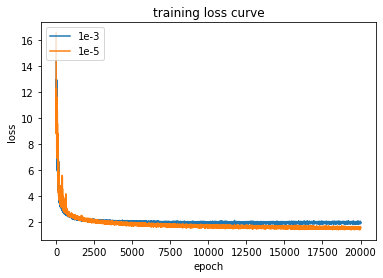

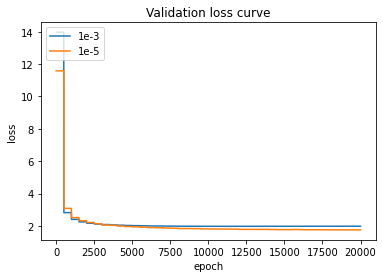

In [255]:
# 0  : lr = 1e-1, reg = 1e-3, momentum = True
# 1  : lr = 1e-1, reg = 1e-3, momentum = False
# 2  : lr = 1e-1, reg = 1e-5, momentum = True
# 3  : lr = 1e-1, reg = 1e-5, momentum = False
# 4  : lr = 5e-2, reg = 1e-3, momentum = True
# 5  : lr = 5e-2, reg = 1e-3, momentum = False
# 6  : lr = 5e-2, reg = 1e-5, momentum = True
# 7  : lr = 5e-2, reg = 1e-5, momentum = False
# 8  : lr = 1e-2, reg = 1e-3, momentum = True
# 9  : lr = 1e-2, reg = 1e-3, momentum = False
# 10 : lr = 1e-2, reg = 1e-5, momentum = True
# 11 : lr = 1e-2, reg = 1e-5, momentum = False

#Rss : 1e-3, 1e-5

plt.plot(train_losses[0])
plt.plot(train_losses[2])
plt.title('training loss curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['1e-3', '1e-5'], loc='upper left')
plt.show()
# "Loss"
plt.plot(val_losses[0])
plt.plot(val_losses[2])
plt.title('Validation loss curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['1e-3', '1e-5'], loc='upper left')
plt.show()

#### 2. Plot the training and validation losses as you vary the Learning Parameter alpha.

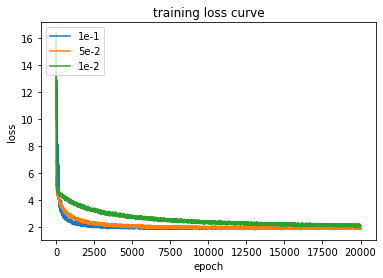

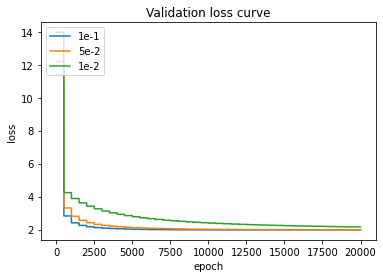

In [256]:
#lrs : 1e-1, 5e-2, 1e-2

plt.plot(train_losses[0])
plt.plot(train_losses[4])
plt.plot(train_losses[8])
plt.title('training loss curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['1e-1', '5e-2', '1e-2'], loc='upper left')
plt.show()
# "Loss"
plt.plot(val_losses[0])
plt.plot(val_losses[4])
plt.plot(val_losses[8])
plt.title('Validation loss curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['1e-1', '5e-2', '1e-2'], loc='upper left')
plt.show()

#### 3. Use two different optimizers: Mini-batch SGD and Mini-batch SGD with Momentum, and plot training and validation losses versus Iteration numbers.

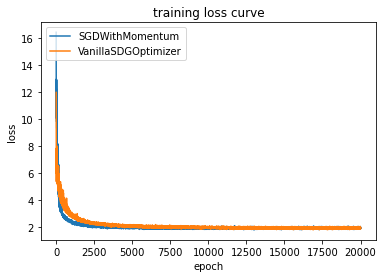

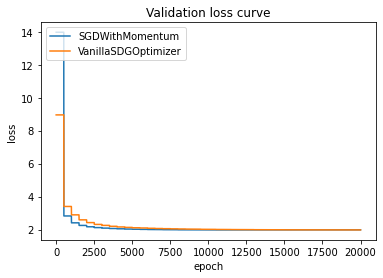

In [257]:
#Momentum : SGDWithMomentum, VanillaSDGOptimizer

plt.plot(train_losses[0])
plt.plot(train_losses[1])
plt.title('training loss curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['SGDWithMomentum', 'VanillaSDGOptimizer'], loc='upper left')
plt.show()
# "Loss"
plt.plot(val_losses[0])
plt.plot(val_losses[1])
plt.title('Validation loss curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['SGDWithMomentum', 'VanillaSDGOptimizer'], loc='upper left')
plt.show()

### d. Finally, fix your model and hyperparameters according to your observations above. Plot accuracy of your classification for training and validation sets, and print your test accuracy. Remember that the test accuracy shoud be at least 50%.

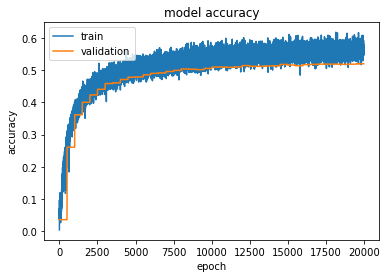

In [259]:
# I picked reg = 1e-5
# lr = 1e-1
# optimizer = SGD With Momentum. [2] indexed log

# 0  : lr = 1e-1, reg = 1e-3, momentum = True
# 1  : lr = 1e-1, reg = 1e-3, momentum = False
#################################################
## 2  : lr = 1e-1, reg = 1e-5, momentum = True ##
#################################################
# 3  : lr = 1e-1, reg = 1e-5, momentum = False
# 4  : lr = 5e-2, reg = 1e-3, momentum = True
# 5  : lr = 5e-2, reg = 1e-3, momentum = False
# 6  : lr = 5e-2, reg = 1e-5, momentum = True
# 7  : lr = 5e-2, reg = 1e-5, momentum = False
# 8  : lr = 1e-2, reg = 1e-3, momentum = True
# 9  : lr = 1e-2, reg = 1e-3, momentum = False
# 10 : lr = 1e-2, reg = 1e-5, momentum = True
# 11 : lr = 1e-2, reg = 1e-5, momentum = False

plt.plot(train_accss[2])
plt.plot(val_accss[2])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [263]:
softmax_out = best_models[2].forward(x_test)
predictions = np.argmax(softmax_out, axis=1)
loss = layer.loss(softmax_out, y_test)
test_acc = np.mean(predictions == y_test)
print("-----------")
print("Learning Rate: 1e-1, Reg: 1e-5, Momentum: SGD With Momentum")
print("Test Loss: {}, Test Accuracy: {}".format(loss, test_acc))      
print("-----------")

-----------
Learning Rate: 1e-1, Reg: 1e-5, Momentum: SGD With Momentum
Test Loss: 1.7745222737860966, Test Accuracy: 0.5157768750906717
-----------


In [264]:
#As we can see best model is already selected from hyperparameter search.
softmax_out = best_of_all_models.forward(x_test)
predictions = np.argmax(softmax_out, axis=1)
loss = layer.loss(softmax_out, y_test)
test_acc = np.mean(predictions == y_test)
print("-----------")
print("Best of All Models")
print("Test Loss: {}, Test Accuracy: {}".format(loss, test_acc))      
print("-----------")

-----------
Best of All Models
Test Loss: 1.7745222737860966, Test Accuracy: 0.5157768750906717
-----------
